**Amazon and Best Buy Electronics**

Acerca de estos datos
Esta es una lista de más de 7000 reseñas en línea de 50 productos electrónicos de sitios web como Amazon y Best Buy proporcionados por la base de datos de productos de Datafiniti . El conjunto de datos incluye la fecha de revisión, la fuente, la calificación, el título, los metadatos del revisor y más.

Usaremos estos datos para identificar cómo los comentarios de los consumidores afectan el proceso de compra del producto . P.ej:

¿Cuáles son las diferentes tendencias para los productos electrónicos?
¿Cuál es la correlación entre las calificaciones de estrellas y las críticas positivas?
¿Cuál es la reputación online de las diferentes marcas?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('https://query.data.world/s/fy6r7kjukmeixqqin2zykqravm4now?dws=00000')

**Step 1: Data Understanding**

In [3]:
df.head(5)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateAdded            7299 non-null   object 
 6   dateUpdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageURLs            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturerNumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primaryCategories    7299 non-null   object 
 15  reviews.date         7238 non-null   o

**Step 2: Data Preperation**

In [5]:
# Selecting Target Columns
df_select= df[['id', 'reviews.rating', 'reviews.text', 'reviews.username']]
df_select


,id,reviews.rating,reviews.text,reviews.username
0,AVpf3txeLJeJML43FN82,5.0,"This keyboard is very easy to type on, but the...",JNH1
1,AVpf3txeLJeJML43FN82,4.0,It's thin and light. I can type pretty easily ...,Appa
2,AVpf3txeLJeJML43FN82,4.0,I love the new design the keys are spaced well...,Kman
3,AVpf3txeLJeJML43FN82,5.0,Attached easily and firmly. Has a nice feel. A...,UpstateNY
4,AVpf3txeLJeJML43FN82,5.0,"Our original keyboard was okay, but did not ha...",Glickster
...,...,...,...,...
7294,AVpgfP3DilAPnD_xtG3M,4.0,This remote was a decent replacement for my lo...,daddyluv01
7295,AVpe8ZRY1cnluZ0-aY4H,4.0,This looks good on my celling. Flushes very we...,Dash001
7296,AVpe8ZRY1cnluZ0-aY4H,4.0,"Great Plate for projector mount, very easy to ...",Anirban
7297,AVpe8ZRY1cnluZ0-aY4H,5.0,This mount worked very well for me when I used...,jbce


In [14]:
# Rename Columns
df_select = df_select.rename(columns={'id': 'Product' , 'reviews.rating':'Review_rating', 'reviews.text':'Reviews', 'reviews.username':'Reviews_username'})
df_select.head()

,Product,Review_rating,Reviews,Reviews_username
0,AVpf3txeLJeJML43FN82,5.0,"This keyboard is very easy to type on, but the...",JNH1
1,AVpf3txeLJeJML43FN82,4.0,It's thin and light. I can type pretty easily ...,Appa
2,AVpf3txeLJeJML43FN82,4.0,I love the new design the keys are spaced well...,Kman
3,AVpf3txeLJeJML43FN82,5.0,Attached easily and firmly. Has a nice feel. A...,UpstateNY
4,AVpf3txeLJeJML43FN82,5.0,"Our original keyboard was okay, but did not ha...",Glickster


In [15]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           7299 non-null   object 
 1   Review_rating     7135 non-null   float64
 2   Reviews           7294 non-null   object 
 3   Reviews_username  7299 non-null   object 
dtypes: float64(1), object(3)
memory usage: 228.2+ KB


In [16]:
# Missing Values
print("Missing Values: "    , df_select.isna().sum())

Missing Values:  Product               0
Review_rating       164
Reviews               5
Reviews_username      0
dtype: int64


In [17]:
duplicated = df_select.loc[df_select.duplicated()]
duplicated

,Product,Review_rating,Reviews,Reviews_username
503,AVpf3txeLJeJML43FN82,NaN,"Without the fanboy title, I am a huge Microsof...",Brian A. Wolters
504,AVpf3txeLJeJML43FN82,NaN,This type cover is a nice upgrade over the one...,Quentin Lawrence
505,AVpf3txeLJeJML43FN82,NaN,This type cover is a nice upgrade over the one...,Quentin Lawrence
506,AVpf3txeLJeJML43FN82,NaN,I've had this keyboard case for a day. I figur...,Reviewer101
985,AVpfnp8HLJeJML43AmVi,NaN,Lowepro has taken an industry by storm with th...,Damien
986,AVpfnp8HLJeJML43AmVi,NaN,Lowepro has taken an industry by storm with th...,Damien
989,AVpfnp8HLJeJML43AmVi,NaN,I've been looking for a camera bag for quite s...,BC in NC
992,AVpfnp8HLJeJML43AmVi,NaN,This bag is not designed to carry every piece ...,David G. Boyd
994,AVpfnp8HLJeJML43AmVi,NaN,I've been looking for a camera bag for quite s...,BC in NC
2481,AVpfKRGKLJeJML433rPX,3.0,Good sound that will fill a small room. Not as...,EricV


In [18]:
duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 503 to 4604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           39 non-null     object 
 1   Review_rating     14 non-null     float64
 2   Reviews           39 non-null     object 
 3   Reviews_username  39 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [29]:
# Counting Variety of products
print('Variety of products: ', df_select['Product'].nunique() )

Variety of products:  50


In [33]:
print('The Electronic Products are: ', df_select['Product'].unique())
print('The Reviews Rating are: ', df_select['Review_rating'].unique())

The Electronic Products are:  ['AVpf3txeLJeJML43FN82' 'AVpgMuGwLJeJML43KY_c' 'AVphzgbJLJeJML43fA0o'
 'AWIm0C3TYSSHbkXwx3S6' 'AVpfnp8HLJeJML43AmVi' 'AV1YFmcQglJLPUi8IGd1'
 'AVpgF1BOilAPnD_xnTsK' 'AVpiUMISilAPnD_xC-hu' 'AVpfIjJULJeJML433Ga2'
 'AVphRsH11cnluZ0-Agzr' 'AVpf24SVLJeJML43FAIX' 'AVzNjwZZ-jtxr-f3yc_y'
 'AVpf2pgLilAPnD_xjed4' 'AVpg8i6NilAPnD_xzQdN' 'AVpfKRGKLJeJML433rPX'
 'AVpgswjcLJeJML43Ro-G' 'AVpfjP9uilAPnD_xdy6-' 'AVpfgGwSLJeJML43-VCn'
 'AV13V_i2glJLPUi8PFgb' 'AVpiEA1f1cnluZ0-JaoG' 'AVpivePGilAPnD_xHH0l'
 'AVpio2wSilAPnD_xGGln' 'AVpfVJXu1cnluZ0-iwTT' 'AVpe7vI_ilAPnD_xRMq2'
 'AVwvGPRyU2_QcyX9R3FW' 'AVpftC_FLJeJML43CLs8' 'AV4GShTMvKc47QAVrFsX'
 'AVphUeKeilAPnD_x3-Be' 'AVpf0Nyo1cnluZ0-rzhu' 'AVqlHaLknnc1JgDc3m5y'
 'AVpjedgc1cnluZ0-W4NI' 'AVsRhL-fQMlgsOJE6zvB' 'AVpfuJ4pilAPnD_xhDyM'
 'AVpg59zyilAPnD_xyv3y' 'AVpgGPyq1cnluZ0-wbTJ' 'AVpjI0B41cnluZ0-T5TH'
 'AVpiFC-LilAPnD_xAgKu' 'AVpgjaudilAPnD_xuDKC' 'AVpiAzN7ilAPnD_x_wOJ'
 'AVpfnuDailAPnD_xfKZY' 'AVpi-P111cnluZ0-SVqq' 'AVpg8GjjLJeJ

*As we can see from the review scores, 5 is the highest score and 1 is the lowest.*
We will analyze the relationship between the "Product" and the "Review_rating" by obtaining the average review rating for each electronic product with the aim of examining the correlation between these two variables and analyzing if review rating influences the purchase of the products.

In [ ]:
# Barplot


In [35]:
# Calcular el promedio de rating por producto electrónico
promedio_rating = df_select.groupby('Product')['Review_rating'].mean()

# Imprimir el resultado
print(promedio_rating)

Product
AV13V_i2glJLPUi8PFgb    4.529412
AV15fqDs-jtxr-f38R4C    4.570470
AV1YFmcQglJLPUi8IGd1    4.798246
AV2Zps11GV-KLJ3al16A    5.000000
AV4GShTMvKc47QAVrFsX    4.397059
AVpe5iL11cnluZ0-ZVzB    5.000000
AVpe7vI_ilAPnD_xRMq2    4.263158
AVpe8ZRY1cnluZ0-aY4H    4.250000
AVpe9BGF1cnluZ0-annA    5.000000
AVpf0Nyo1cnluZ0-rzhu    4.600000
AVpf24SVLJeJML43FAIX    4.535714
AVpf2pgLilAPnD_xjed4    4.549738
AVpf3txeLJeJML43FN82    4.606061
AVpfIjJULJeJML433Ga2    4.604478
AVpfKRGKLJeJML433rPX    4.297753
AVpfVI9wilAPnD_xZxH-    4.796296
AVpfVJXu1cnluZ0-iwTT    3.500000
AVpfgGwSLJeJML43-VCn    4.333333
AVpfjP9uilAPnD_xdy6-    4.830000
AVpfnp8HLJeJML43AmVi    4.625954
AVpfnuDailAPnD_xfKZY    4.263305
AVpftC_FLJeJML43CLs8    4.412903
AVpfuJ4pilAPnD_xhDyM    4.476510
AVpg59zyilAPnD_xyv3y    4.800000
AVpg8GjjLJeJML43Uplr    5.000000
AVpg8i6NilAPnD_xzQdN    4.301170
AVpgF1BOilAPnD_xnTsK    4.298701
AVpgGPyq1cnluZ0-wbTJ    3.850000
AVpgMuGwLJeJML43KY_c    4.453333
AVpgfP3DilAPnD_xtG3M    3.945761
AV

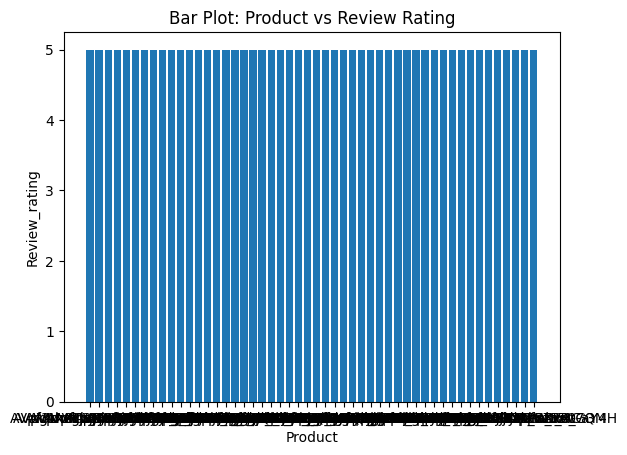

In [38]:
# Gráfico de barras
plt.bar(df["Product"], df_select["Review_rating"==5])

    # Etiquetas de los ejes y título
plt.xlabel("Product")
plt.ylabel("Review_rating")
plt.title("Bar Plot: Product vs Review Rating")

    # Mostrar el gráfico
plt.show()

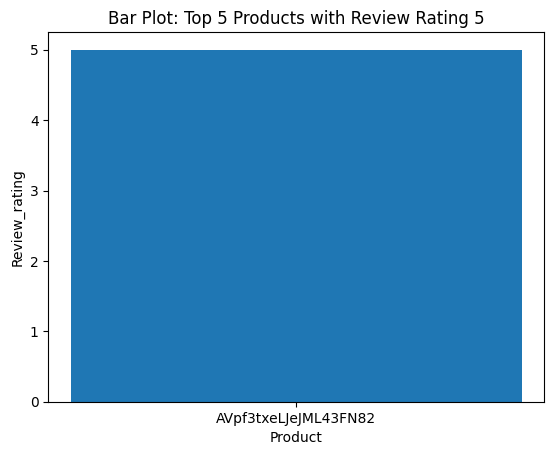

In [39]:
# Obtener los 5 valores más altos de Review_rating
df_top5 = df_select[df_select["Review_rating"] == 5].head(5)

# Gráfico de barras
plt.bar(df_top5["Product"], df_top5["Review_rating"])

# Etiquetas de los ejes y título
plt.xlabel("Product")
plt.ylabel("Review_rating")
plt.title("Bar Plot: Top 5 Products with Review Rating 5")

# Mostrar el gráfico
plt.show()


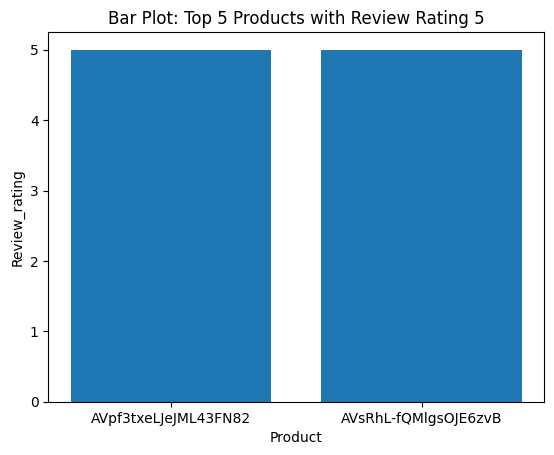

In [40]:
# Ordenar el DataFrame por Review_rating en orden descendente
df_sorted = df_select.sort_values(by="Review_rating", ascending=False)

# Filtrar los productos con Review_rating igual a 5 y seleccionar los primeros 5
df_top5 = df_sorted[df_sorted["Review_rating"] == 5].head(5)

# Gráfico de barras
plt.bar(df_top5["Product"], df_top5["Review_rating"])

# Etiquetas de los ejes y título
plt.xlabel("Product")
plt.ylabel("Review_rating")
plt.title("Bar Plot: Top 5 Products with Review Rating 5")

# Mostrar el gráfico
plt.show()


In [43]:
def plot_top_products(df_select):
    """
    Esta función crea un gráfico de barras para mostrar los productos con la mayor cantidad de "Review_rating" igual a 5.

    Args:
        df (pandas.DataFrame): El DataFrame que contiene las columnas "Product" y "Review_rating".
    """
    # Filtrar los productos con Review_rating igual a 5
    df_filtered = df_select[df_select["Review_rating"] == 5]

    # Ordenar los productos por cantidad de Review_rating en orden descendente
    df_sorted = df_filtered.sort_values(by="Review_rating", ascending=False)

    # Obtener los 5 primeros productos
    top_products = df_sorted.head(5)

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(top_products["Product"], top_products["Review_rating"])

    # Etiquetas de los ejes y título
    plt.xlabel("Product")
    plt.ylabel("Review_rating_count")
    plt.title("Top Products with Review Rating 5")

    # Mostrar el gráfico
    plt.show()